   # <span style= 'color: green'> Google Data Analytics Capstone Project </span>




## <span style= 'color: green'> Case Study: How can a wellness technology company play it smart?</span>

## <span style= 'color: green'> Company: Bellabeat</span>
Bellabeat is a wellness Company headquartered in San Francisco that develops wearable computers for women.

### <span style= 'color: green'> Business Task:</span>

- Analyze FitBit Fitness Tracker Data to gain insights into how consumers are using the FitBit app.
- Discover trends for Bellabeat marketing strategy. 
 

### <span style= 'color: green'> Key Stakeholders:</span>
- Urška Sršen (Bellabeat’s cofounder and Chief Creative Oﬃcer)
- Sando Mur (Mathematician and Bellabeat’s cofounder) 
- Bellabeat marketing analytics team



### <span style= 'color: green'> Data Source:</span>
- [FitBit Fitness Tracker Data](https://www.kaggle.com/arashnic/fitbit)
- The data was gotten from kaggle and made available by [Möbius](https://www.kaggle.com/datasets/arashnic/fitbit). 
- Date Range: 12th March, 2016 to 12th May, 2016.
- 18 CSV files on different personal tracker data from 30 fitbit users.


 


## <span style= 'color: green'> Import Libraries And Data</span>

In [1]:
# importing libraries

import pandas as pd
import seaborn as sns
import numpy as np
import datetime as dt


import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure


%matplotlib inline

# adjusts the configuration of the plot we create

matplotlib.rcParams['figure.figsize'] = (8,6) 



# reading the data I need for cleaning and analysis

daily_act= pd.read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv')




# loading Heart Rate data

heart_rate= pd.read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv')



# loading "Sleep Day" data

sleep= pd.read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv')


## <span style= 'color: green'> Data Cleaning And Manipulation</span>

In this phase, I will be performing the following operation:

- Inspect the whole data.
- Check for missing values and errors to avoid issues and bias during analysis.
- Convert columns to it's right data type to make analysis easy.
- Organize data to make it easier to read.

### <span style= 'color: green'> Daily Activity </span>

I will start by cleaning the Daily Activity data then proceed to other dataset.

In [2]:
# displaying Daily Activity data


daily_act

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,5/8/2016,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847
936,8877689391,5/9/2016,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710
937,8877689391,5/10/2016,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832
938,8877689391,5/11/2016,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832


**Columns for Days of the week, total minutes and  total hours are needed for proper analysis.**

In [3]:
# inspecting Daily Activity data


daily_act.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

**"ActivityDate" column needs to be changed to a datetime data type.**

In [4]:
# inspecting missing data


daily_act.isnull().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

**No missing value detected from inspection.**

In [5]:
# confirming number of unique value of "Id' column


len(daily_act['Id'].unique())

33

**33 unique values of the "Id" column were counted.**

In [6]:
# converting "ActivityDate" to datetime64 data type

daily_act['ActivityDate'] = pd.to_datetime(daily_act['ActivityDate'], format='%m/%d/%Y')



# confirming the change

daily_act.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

**"Activity date" has been converted to datetime data type.**

In [7]:
# adding 3 new columns to the dataframe ( 'Days', 'Total_Mins', 'Total_Hrs')



# creating new list of rearranged columns

new_cols = ['Id', 'ActivityDate', 'Days', 'TotalSteps', 'TotalDistance', 'TrackerDistance', 'LoggedActivitiesDistance', 'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes', 'TotalMins', 'TotalHrs', 'Calories']



# rearranging columns based on the newly created "new_cols"

daily = daily_act.reindex(columns=new_cols)



# showing 1st 5 rows for confirmation

daily.head()

,Id,ActivityDate,Days,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,TotalMins,TotalHrs,Calories
0,1503960366,2016-04-12,NaN,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,NaN,NaN,1985
1,1503960366,2016-04-13,NaN,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,NaN,NaN,1797
2,1503960366,2016-04-14,NaN,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,NaN,NaN,1776
3,1503960366,2016-04-15,NaN,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,NaN,NaN,1745
4,1503960366,2016-04-16,NaN,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,NaN,NaN,1863


**3 new colums (Days, TotalMins, TotalHrs) have been created for the days of the week, total minutes and total hours.**  

In [8]:
# inputting the days of the week into "Days" column 

daily['Days'] = daily['ActivityDate'].dt.day_name()

# displaying the dataframe for confirmation

daily.head(5)

,Id,ActivityDate,Days,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,TotalMins,TotalHrs,Calories
0,1503960366,2016-04-12,Tuesday,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,NaN,NaN,1985
1,1503960366,2016-04-13,Wednesday,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,NaN,NaN,1797
2,1503960366,2016-04-14,Thursday,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,NaN,NaN,1776
3,1503960366,2016-04-15,Friday,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,NaN,NaN,1745
4,1503960366,2016-04-16,Saturday,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,NaN,NaN,1863


In [9]:
# inputting data into "TotalMins" column

daily['TotalMins'] = daily['VeryActiveMinutes'] + daily['FairlyActiveMinutes'] + daily['LightlyActiveMinutes'] + daily['SedentaryMinutes']


daily.head(5)

,Id,ActivityDate,Days,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,TotalMins,TotalHrs,Calories
0,1503960366,2016-04-12,Tuesday,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1094,NaN,1985
1,1503960366,2016-04-13,Wednesday,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1033,NaN,1797
2,1503960366,2016-04-14,Thursday,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1440,NaN,1776
3,1503960366,2016-04-15,Friday,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,998,NaN,1745
4,1503960366,2016-04-16,Saturday,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1040,NaN,1863


**4 columns were added together to get values for the "TotalMins" column, the 4 columns added were the very active, fairly active, lightly active and sedentary columns.**   

In [10]:
# inputting rounded up data into "TotalHrs" columns

daily['TotalHrs'] = round(daily['TotalMins'] / 60)


# displaying 1st 5 rows for confirmation
daily['TotalHrs'].head(5)

0    18.0
1    17.0
2    24.0
3    17.0
4    17.0
Name: TotalHrs, dtype: float64

**"TotalHrs" column values were gotten from converting "TotalMins" column values in to hours.**

From the above cleaning, I noticed the data was dirty because:

- They were 33 unique Ids, instead of 30 unique Ids as expected from 30 fitness tracker users.
- "ActivityDate" column was wrongly classified as object data type and had to be converted to datetime data type.

### <span style= 'color: green'> Heart Rate </span>

In [11]:
# displaying information about the data


heart_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2483658 entries, 0 to 2483657
Data columns (total 3 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Id      int64 
 1   Time    object
 2   Value   int64 
dtypes: int64(2), object(1)
memory usage: 56.8+ MB


**"Time" column should be a Datetime data type instead of object date type.**

In [12]:
# displaying full data


heart_rate

,Id,Time,Value
0,2022484408,4/12/2016 7:21:00 AM,97
1,2022484408,4/12/2016 7:21:05 AM,102
2,2022484408,4/12/2016 7:21:10 AM,105
3,2022484408,4/12/2016 7:21:20 AM,103
4,2022484408,4/12/2016 7:21:25 AM,101
...,...,...,...
2483653,8877689391,5/12/2016 2:43:53 PM,57
2483654,8877689391,5/12/2016 2:43:58 PM,56
2483655,8877689391,5/12/2016 2:44:03 PM,55
2483656,8877689391,5/12/2016 2:44:18 PM,55


**"Time" column needs to be split into date only and time only columns.**

In [13]:
# converting "Time" column to date time


heart_rate['Time'] = pd.to_datetime(heart_rate['Time'], format = "%m/%d/%Y %H:%M:%S %p")

heart_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2483658 entries, 0 to 2483657
Data columns (total 3 columns):
 #   Column  Dtype         
---  ------  -----         
 0   Id      int64         
 1   Time    datetime64[ns]
 2   Value   int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 56.8 MB


**"Time" column has successfully been converted to a datetime data type.**

In [14]:
# checking the number of unique value of "Id" column


len(heart_rate['Id'].unique())

14

**we have 14 unique values for the "Id" column.**

In [15]:
# splitting "Time" column into two new columns


heart_rate['Date'] = [d.date() for d in heart_rate['Time']]

heart_rate['Time_Only'] = [d.time() for d in heart_rate['Time']]

heart_rate

,Id,Time,Value,Date,Time_Only
0,2022484408,2016-04-12 07:21:00,97,2016-04-12,07:21:00
1,2022484408,2016-04-12 07:21:05,102,2016-04-12,07:21:05
2,2022484408,2016-04-12 07:21:10,105,2016-04-12,07:21:10
3,2022484408,2016-04-12 07:21:20,103,2016-04-12,07:21:20
4,2022484408,2016-04-12 07:21:25,101,2016-04-12,07:21:25
...,...,...,...,...,...
2483653,8877689391,2016-05-12 02:43:53,57,2016-05-12,02:43:53
2483654,8877689391,2016-05-12 02:43:58,56,2016-05-12,02:43:58
2483655,8877689391,2016-05-12 02:44:03,55,2016-05-12,02:44:03
2483656,8877689391,2016-05-12 02:44:18,55,2016-05-12,02:44:18


**"Time" column has successfully been split into "Date" and "Time_Only" columns.**

In [16]:
# Dropping "Time" column


heart_rate.drop(columns = ['Time'], inplace = True)

heart_rate

,Id,Value,Date,Time_Only
0,2022484408,97,2016-04-12,07:21:00
1,2022484408,102,2016-04-12,07:21:05
2,2022484408,105,2016-04-12,07:21:10
3,2022484408,103,2016-04-12,07:21:20
4,2022484408,101,2016-04-12,07:21:25
...,...,...,...,...
2483653,8877689391,57,2016-05-12,02:43:53
2483654,8877689391,56,2016-05-12,02:43:58
2483655,8877689391,55,2016-05-12,02:44:03
2483656,8877689391,55,2016-05-12,02:44:18


**"Time" column has been removed from the dataframe.**

In [17]:
# renaming "Time_Only" column to "Time"


heart_rate.rename(columns = {"Time_Only":"Time"}, inplace = True)

heart_rate

,Id,Value,Date,Time
0,2022484408,97,2016-04-12,07:21:00
1,2022484408,102,2016-04-12,07:21:05
2,2022484408,105,2016-04-12,07:21:10
3,2022484408,103,2016-04-12,07:21:20
4,2022484408,101,2016-04-12,07:21:25
...,...,...,...,...
2483653,8877689391,57,2016-05-12,02:43:53
2483654,8877689391,56,2016-05-12,02:43:58
2483655,8877689391,55,2016-05-12,02:44:03
2483656,8877689391,55,2016-05-12,02:44:18


**"Time_Only" column has been renamed to "Time".**

### <span style= 'color: green'> Sleep Day </span>

In [18]:
# displaying information about the data


sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDay            413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinutesAsleep  413 non-null    int64 
 4   TotalTimeInBed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB


**"SleepDay" needs to be converted to a datetime data type.**

In [19]:
# displaying Sleep Data


sleep

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712
...,...,...,...,...,...
408,8792009665,4/30/2016 12:00:00 AM,1,343,360
409,8792009665,5/1/2016 12:00:00 AM,1,503,527
410,8792009665,5/2/2016 12:00:00 AM,1,415,423
411,8792009665,5/3/2016 12:00:00 AM,1,516,545


**A column for total hours asleep is needed.**

In [20]:
# checking the number of unique value of "Id" column



len(sleep['Id'].unique())

24

**24 unique values for the "Id" column were detected.**

In [21]:
# changing "sleepDay" column from object datatype to datetime64


sleep['SleepDay']= pd.to_datetime(sleep['SleepDay'], format = "%m/%d/%Y %H:%M:%S %p")

sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Id                  413 non-null    int64         
 1   SleepDay            413 non-null    datetime64[ns]
 2   TotalSleepRecords   413 non-null    int64         
 3   TotalMinutesAsleep  413 non-null    int64         
 4   TotalTimeInBed      413 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 16.3 KB


**"SleepDay" column was successfully converted into a datetime data type.**

In [22]:
# creating new column called "TotalHoursAsleep"


new_cols = ['Id', 'SleepDay', 'TotalSleepRecords', 'TotalMinutesAsleep', 'TotalHoursAsleep', 'TotalTimeInBed']

sleep = sleep.reindex(columns = new_cols)

sleep.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalHoursAsleep,TotalTimeInBed
0,1503960366,2016-04-12 12:00:00,1,327,NaN,346
1,1503960366,2016-04-13 12:00:00,2,384,NaN,407
2,1503960366,2016-04-15 12:00:00,1,412,NaN,442
3,1503960366,2016-04-16 12:00:00,2,340,NaN,367
4,1503960366,2016-04-17 12:00:00,1,700,NaN,712


**Total hours asleep column was created and named "TotalHoursAsleep".** 

In [23]:
# adding data to the new column by converting minutes to hours


sleep['TotalHoursAsleep'] = round(sleep['TotalMinutesAsleep'] / 60)

sleep

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalHoursAsleep,TotalTimeInBed
0,1503960366,2016-04-12 12:00:00,1,327,5.0,346
1,1503960366,2016-04-13 12:00:00,2,384,6.0,407
2,1503960366,2016-04-15 12:00:00,1,412,7.0,442
3,1503960366,2016-04-16 12:00:00,2,340,6.0,367
4,1503960366,2016-04-17 12:00:00,1,700,12.0,712
...,...,...,...,...,...,...
408,8792009665,2016-04-30 12:00:00,1,343,6.0,360
409,8792009665,2016-05-01 12:00:00,1,503,8.0,527
410,8792009665,2016-05-02 12:00:00,1,415,7.0,423
411,8792009665,2016-05-03 12:00:00,1,516,9.0,545


**Total minutes asleep was converted to hours and inserted into the "TotalHoursAsleep" column.**

## <span style= 'color: green'> ANALYSIS & VISUALIZATION </span>

### <span style= 'color: green'> Daily Activity (Visuals) </span>

In [24]:
# checking the mean, median, min and max of the dataframe


daily.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,TotalMins,TotalHrs,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,1218.753191,20.313830,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,265.931767,4.437283,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,989.750000,16.000000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,1440.000000,24.000000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,1440.000000,24.000000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,1440.000000,24.000000,4900.000000


In [25]:
# sorting Data according to days of the week

sort = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']

daily.index= pd.CategoricalIndex(daily['Days'], categories= sort, ordered= True)

daily_sort= daily.sort_index()

daily_sort

,Id,ActivityDate,Days,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,TotalMins,TotalHrs,Calories
Days,,,,,,,,,,,,,,,,,,
Monday,8378563200,2016-05-09,Monday,8382,6.65,6.65,2.092147,1.27,0.66,4.72,0.00,71,13,171,772,1027,17.0,3721
Monday,1844505072,2016-05-02,Monday,0,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,0,0,0,1440,1440,24.0,1348
Monday,3977333714,2016-05-02,Monday,16520,11.05,11.05,0.000000,1.54,6.48,3.02,0.00,24,143,176,713,1056,18.0,1760
Monday,6290855005,2016-04-18,Monday,6885,5.21,5.21,0.000000,0.00,0.00,5.19,0.02,0,0,271,1169,1440,24.0,2766
Monday,8378563200,2016-04-25,Monday,12405,9.84,9.84,2.092147,5.05,0.87,3.92,0.00,117,16,141,692,966,16.0,4005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sunday,1844505072,2016-05-08,Sunday,0,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,0,0,0,1440,1440,24.0,1347
Sunday,8378563200,2016-04-24,Sunday,3703,2.94,2.94,0.000000,0.00,0.00,2.94,0.00,0,0,135,734,869,14.0,2741
Sunday,3977333714,2016-04-24,Sunday,14112,10.00,10.00,0.000000,3.27,4.56,2.17,0.00,30,95,129,660,914,15.0,1655


**The dataframe was sorted by "Days" column for proper visuals while plotting.**

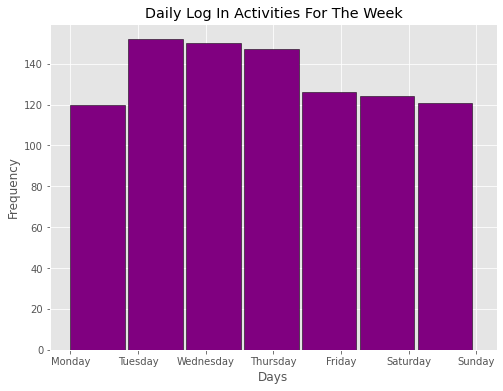

In [26]:
# plotting Histogram

plt.hist(daily_sort.Days, bins = 7, 
         width = 0.8, edgecolor = 'black', color= 'purple')




# adding labels and title

plt.xlabel('Days')
plt.ylabel('Frequency')
plt.title('Daily Log In Activities For The Week')

plt.show()

##### Key Findings

From the above histogram, I discovered that:
- Users preferred to track their activities on the app during midweek, majorly on Tuesdays, Wednesdays and Thursdays.

- Activity tracking dropped on Friday, weekends and Monday.

<AxesSubplot:xlabel='Days', ylabel='TotalSteps'>

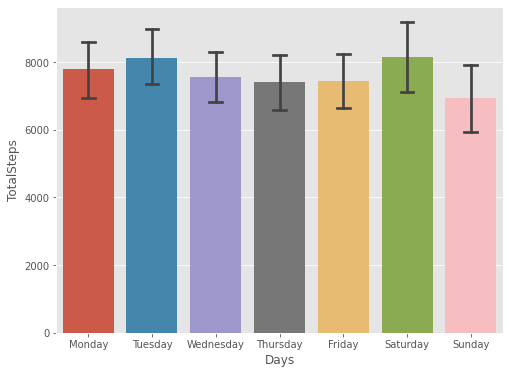

In [27]:
# plotting bar chart

sns.barplot(x="Days", y="TotalSteps", data=daily, 
                                   order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], 
                                   capsize=.2)

#### Key Findings

From the above bar chart, I discovered that:
- Most users were highly active on Tuesdays and Saturdays.
- There was a decrease in users activity on Mondays, Wednesdays, Thursdays, Fridays and on Sundays which is the least.

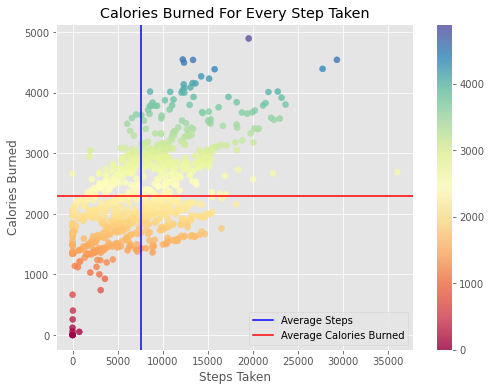

In [28]:
# plotting scatter plot

plt.scatter(daily.TotalSteps, daily.Calories, 
            alpha = 0.8, c = daily.Calories, 
            cmap = 'Spectral')



# adding Labels and Title

avg_calories = 2303
avg_steps = 7637


plt.axvline(avg_steps, color = 'Blue', label = 'Average Steps')
plt.axhline(avg_calories, color = 'Red', label = 'Average Calories Burned')
plt.xlabel('Steps Taken')
plt.ylabel('Calories Burned')
plt.title('Calories Burned For Every Step Taken')
plt.grid(True)
plt.colorbar()
plt.legend()
plt.show()

#### Key Findings

From the above scatter plot, we discovered that:

- The correlation between total steps and calories was positive. (i.e As more steps are taken, more calories are burned)

- There was an observation where a user burned less 3,000 calories from 35,000 steps.


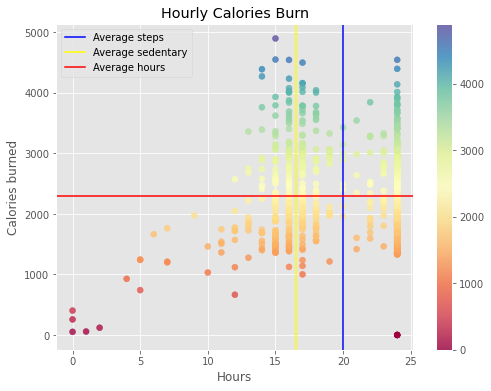

In [29]:
# plotting scatter plot

plt.scatter(daily.TotalHrs, daily.Calories, 
            alpha = 0.8, c = daily.Calories, 
            cmap = 'Spectral')



# adding Labels and Titles

Avg_calories = 2303
Avg_hours = 20
Avg_sedentary = 991 / 60


plt.axvline(Avg_hours, color = 'Blue', label = 'Average steps')
plt.axvline(Avg_sedentary, color = 'Yellow', label = 'Average sedentary')
plt.axhline(Avg_calories, color = 'Red', label = 'Average hours')
plt.xlabel('Hours')
plt.ylabel('Calories burned')
plt.title('Hourly Calories Burn')
plt.legend()
plt.colorbar()
plt.grid(True)
plt.show()

#### Key Findings
From the above scatter plot, I discovered that:
- The correlation between calories burned and hours was weak.
- The few outliners observered may be due to errors in data collection.


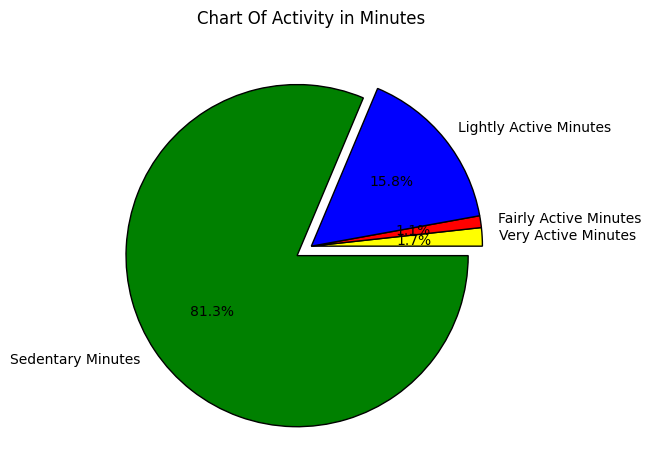

In [30]:
# calculating total of individual minutes column

VeryActiveMinutes = daily['VeryActiveMinutes'].sum()
FairlyActiveMinutes = daily['FairlyActiveMinutes'].sum()
LightlyActiveMinutes = daily['LightlyActiveMinutes'].sum()
SedentaryMinutes = daily['SedentaryMinutes'].sum()




# plotting pie chart

slices = [VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes, SedentaryMinutes]
labels = ['Very Active Minutes', 'Fairly Active Minutes', 'Lightly Active Minutes', 'Sedentary Minutes']
colours = ['Yellow', 'Red', 'Blue', 'Green']
explode = [0, 0, 0, 0.1]
plt.style.use('default')
plt.pie(slices, labels = labels, 
        colors = colours, wedgeprops = {'edgecolor': 'Black'}, 
        explode = explode, autopct = '%1.1f%%')
plt.title('Chart Of Activity in Minutes')
plt.tight_layout()
plt.show()

#### Key Findings


From the pie chart above, I discovered that:

- Sedentary minutes had the most slice at 81.3%, which means users are mostly seated and inactive most of the time.

- Users used the FitBit app to log daily regular activities.

### <span style= 'color: green'> Heart Rate (Visuals) </span>

In [31]:
# grouping the dataframe  by "Date" and getting the mean heart rate value for each date.


heart = heart_rate.groupby('Date').agg({'Value': 'mean'})
heart

,Value
Date,
2016-04-12,79.707783
2016-04-13,75.400483
2016-04-14,76.155729
2016-04-15,79.982565
2016-04-16,80.396832
2016-04-17,78.227425
2016-04-18,76.665048
2016-04-19,78.786625
2016-04-20,77.694633


**The mean of the heart values were gotten and grouped them by date for plotting.** 

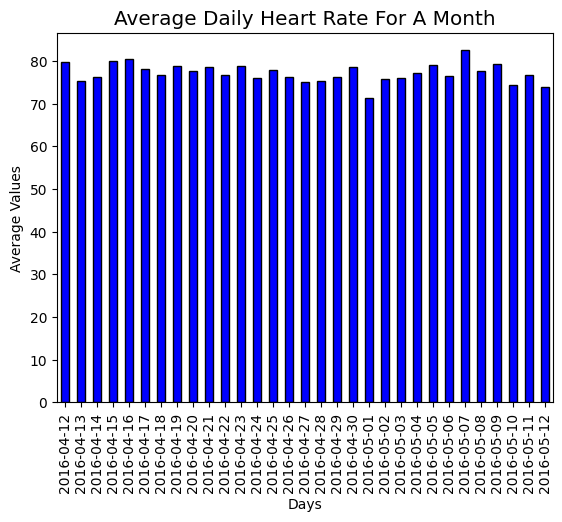

In [32]:
# ploting bar chart


heart['Value'].plot(kind = 'bar', edgecolor = 'black', color = 'blue')
plt.style.use('bmh')

plt.title('Average Daily Heart Rate For A Month')
plt.ylabel('Average Values')
plt.xlabel('Days')

plt.show()

#### Key Fingings


From the above bar chart, I discovered that:

- Daily average heart rate values were between 71 and 82.
- Highest heart rate was read on  the 7th May, 2016.
- While the lowest heart rate was read on the 1st, May 2016.

### <span style= 'color: green'> Sleep Day (Visuals) </span>

In [33]:
# checking the mean, median, min and max of the dataframe


sleep.describe()

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalHoursAsleep,TotalTimeInBed
count,4.130000e+02,413.000000,413.000000,413.000000,413.000000
mean,5.000979e+09,1.118644,419.467312,6.995157,458.639225
std,2.060360e+09,0.345521,118.344679,1.986600,127.101607
min,1.503960e+09,1.000000,58.000000,1.000000,61.000000
25%,3.977334e+09,1.000000,361.000000,6.000000,403.000000
50%,4.702922e+09,1.000000,433.000000,7.000000,463.000000
75%,6.962181e+09,1.000000,490.000000,8.000000,526.000000
max,8.792010e+09,3.000000,796.000000,13.000000,961.000000


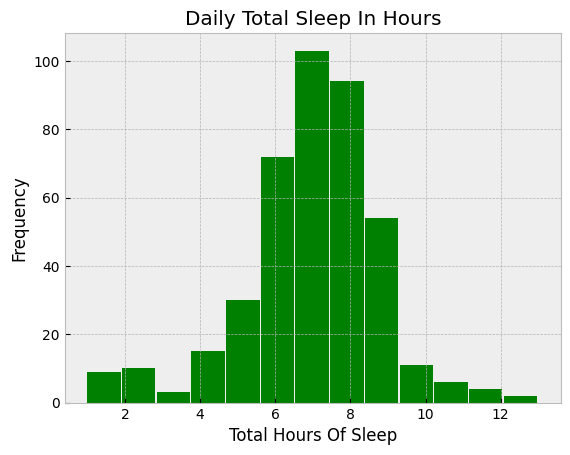

In [34]:
# plotting Histogram


hours_asleep = sleep['TotalHoursAsleep']

fig, ax = plt.subplots()
ax.hist(hours_asleep, bins= 13, width = 0.89, color = 'green')

plt.xlabel('Total Hours Of Sleep')
plt.ylabel('Frequency')
plt.title('Daily Total Sleep In Hours')

plt.show()

#### Key Findings

From the above histogram, I discovered that there was an increase in distribution frequency between 6 to 8 hours


### Key Insights
- All users have an average lower daily steps at 8,329 (recommended steps= 10,000)
- The more steps a user take, the more calories the user burns.
- Users prefer to track their activities on the app during midweek.
- Users spend more time seated and being inactive which this is bad for their health. 
- Users spend 6.9 hours asleep on average.
    
- Most Users are very active on Saturdays.


| <h3>Dataset</h3> | <h3> Recommendations </h3>|
|--- |---|
| Daily Activities | Bellabeat app should have a feature that helps users identify their health goals and motivate them to achieve it daily, as this will encourage daily engagement.<hr> Users should be notified if they have not done or completed their fitness activities in a day, the notification will kill laziness and help remind some users that might forget to do their daily fitness exercises.  <hr>  Bellabeat App can include 3 basic exercises for users to do regularly, these exercises could be walking, running and cycling.<hr> Bellabeat should ensure the app is always running in the phone's background, as this will give a better data about each user and avoid bias. |
| Heart Rate | Bellabeat  should add a feature that monitors user's heart rate per minute.  <hr> The app should notify users if the heart rate is reading abnormal values. |
| Sleep | The Bellabeat app should encourange users to go to bed early everyday and sleep for atleast 7 hours as it is the recommended sleep time for a healthy life. <hr> Bellabeat should add a feature to their app which automatically turns on the phone's "Do Not Disturb" feature as this will avoid the user from being disturbed by calls, social media notification and media sound and improve sleep time.  |